---

# **ONLINE SHOPPERS INTENTIONS**

**Oleh  : Yunido Baheramsyah**


This program is designed to predict whether a website visitor will make a purchase based on their behavior during the session.

---

# **I. INTRODUCTION**

**Background**

Although the e-commerce site has successfully attracted high traffic, the purchase conversion rate remains low, indicating that many visits do not result in transactions. Accordingly, as the site’s data scientist, I have been tasked with using a data-driven approach to analyze visitor behavior patterns indicative of purchase propensity, so that appropriate interventions can be deployed before users leave the site without transacting.

**Objective**

The objective of this project is to build a supervised learning classification model that predicts whether a website visitor will make a purchase based on their on-site behavior. This model is expected to support the marketing and product teams in identifying high-propensity user profiles, enabling the company to implement more targeted and effective strategies.

**Problem Statement**

The development of an accurate and measurable classification model is necessary to predict the likelihood of an e-commerce site visitor making a purchase, based on historical behavioral data such as visit duration, interaction with product pages, and visitor type. This model must be able to deliver optimal performance based on metrics such as F1 Score, making it reliable for supporting business decision-making. The development process is targeted to be completed within a maximum of one month so that it can be immediately utilized by the marketing or product teams to enhance conversion rates through a data-driven and predictive approach.

# **II. IMPORT LIBRARIES**

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import re

# stats library
from scipy import stats
from scipy.stats import zscore
from scipy.stats import skew
from scipy.stats import pearsonr

# Preprocessing and model building
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV


# Model saving
import pickle

# Configuring the chart’s appearance
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# **III. DATA LOADING**

In [3]:
# load dataset from CSV file
df_raw = pd.read_csv('online_shoppers_intention.csv')

# Displaying the first 10 rows to see the initial structure of the data
df_raw.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


> The dataset was obtained from the UCI Machine Learning Repository at the following URL: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [4]:
# Checking the size of the dataset (number of rows and columns)
df_raw.shape

(12330, 18)

In [5]:
# Displaying information about data types and non-null value counts
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

> **Insight**

Here are the key takeaways from df.info():

- **Size & completeness:** 12,330 sessions with 18 columns and no missing values. Imputation isn’t required.

- **Target & types:** `Revenue` is boolean (purchase vs. no purchase). There are 7 floats, 7 ints, 2 booleans (`Weekend`, `Revenue`), and 2 objects (`Month`, `VisitorType`).

- **Feature groups:**

    - **Behavior counts & time**: `Administrative`, `Informational`, `ProductRelated` (ints) with corresponding `_Duration` features (floats). Consider derived ratios (e.g., duration per page type) and totals.

    - **Engagement metrics**: `BounceRates`, `ExitRates`, `PageValues`, `SpecialDay` (floats). Rates are proportions; PageValues is typically right-skewed—scale/transform if needed.

    - **Tech/source identifiers**: `OperatingSystems`, `Browser`, `Region`, `TrafficType` are integer-coded categoricals; treat accordingly (one-hot/target encoding), not as continuous.

    - **Calendaring & persona**: `Month` and `VisitorType` are categorical strings; encode in an ordered (month) or nominal fashion as appropriate. `Weekend` flags weekend sessions.

In [6]:
# Rename columns for easier usability
# For this case, apply CamelCase-to-snake_case conversion (ref: GeeksforGeeks)
def camel_to_snake(name):
    name = re.sub(r'(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', name)
    return name.lower()

# Rename all columns at once
df_raw.columns = [camel_to_snake(col) for col in df_raw.columns]

# Show column names after change
df_raw.columns.tolist()

['administrative',
 'administrative__duration',
 'informational',
 'informational__duration',
 'product_related',
 'product_related__duration',
 'bounce_rates',
 'exit_rates',
 'page_values',
 'special_day',
 'month',
 'operating_systems',
 'browser',
 'region',
 'traffic_type',
 'visitor_type',
 'weekend',
 'revenue']

> **Insight:**
Column names have been successfully converted to snake_case (e.g., `administrative`, `bounce_rates`, `revenue`). This improves readability and consistency across the project and reduces the risk of errors when referencing columns.

In [7]:
# Check dataset info again
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   administrative             12330 non-null  int64  
 1   administrative__duration   12330 non-null  float64
 2   informational              12330 non-null  int64  
 3   informational__duration    12330 non-null  float64
 4   product_related            12330 non-null  int64  
 5   product_related__duration  12330 non-null  float64
 6   bounce_rates               12330 non-null  float64
 7   exit_rates                 12330 non-null  float64
 8   page_values                12330 non-null  float64
 9   special_day                12330 non-null  float64
 10  month                      12330 non-null  object 
 11  operating_systems          12330 non-null  int64  
 12  browser                    12330 non-null  int64  
 13  region                     12330 non-null  int

---

# **IV. EXPLORATORY DATA ANALYSIS**

In [8]:
# Show target distribution
df_raw['revenue'].value_counts()

revenue
False    10422
True      1908
Name: count, dtype: int64

> **Insight:**
The target distribution of `revenue` shows the number of visitors who completed a purchase (True) versus those who did not (False). This is crucial for assessing class imbalance and determining whether mitigation (e.g., resampling, class weights, or threshold tuning) is needed.

## **1. Target Distribution Visualization**

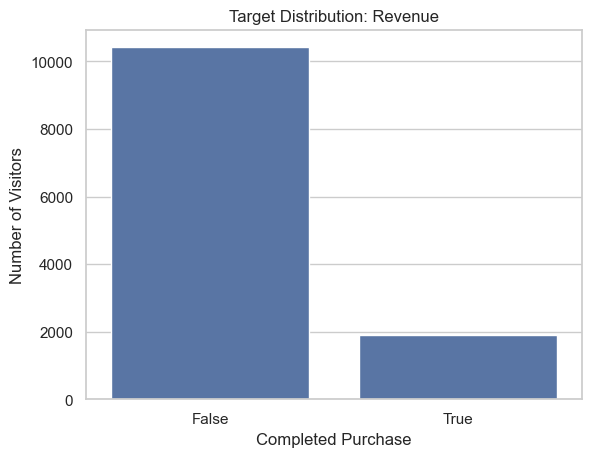

In [9]:
# Target Distribution Visualization
sns.countplot(x='revenue', data=df_raw)
plt.title('Target Distribution: Revenue')
plt.xlabel('Completed Purchase')
plt.ylabel('Number of Visitors')
plt.show()

> **Insight:**
It is evident that non-purchasing visitors substantially outnumber purchasing ones, indicating a class imbalance that should be accounted for in subsequent modeling.

## **2. Analysis by Month of Visit**

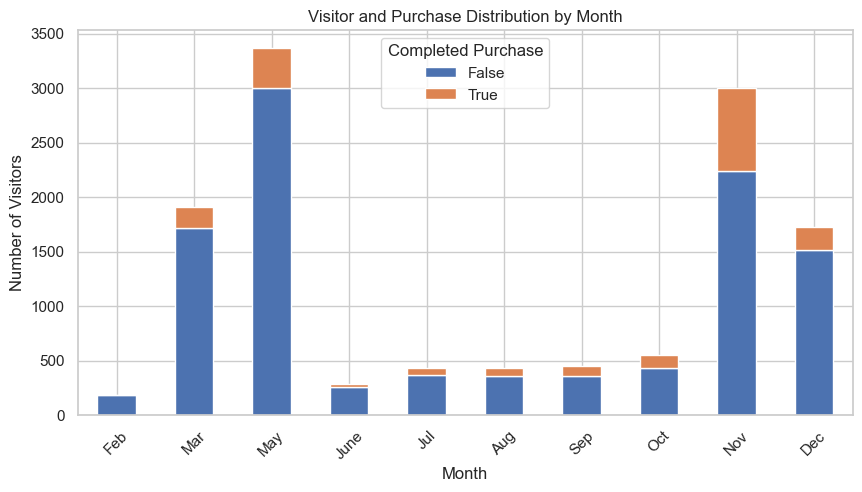

In [10]:
# Reorder the 'month' column
month_order = ['Feb', 'Mar', 'May', 'June',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


df_raw['month'] = pd.Categorical(df_raw['month'], categories=month_order, ordered=True)

df_raw_sorted = df_raw.sort_values('month')

# Grouping by Month and Purchase Outcome
monthly_revenue = df_raw.groupby(['month', 'revenue']).size().unstack().fillna(0)

# Visualization
monthly_revenue.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Visitor and Purchase Distribution by Month')
plt.ylabel('Number of Visitors')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Completed Purchase')
plt.show()

>  **Insight:**
Certain months, such as November and May, show higher purchase rates than others. This indicates potential seasonality that can inform business strategy and be incorporated as an additional feature in the model.

## **3. Analysis by Visitor Type**

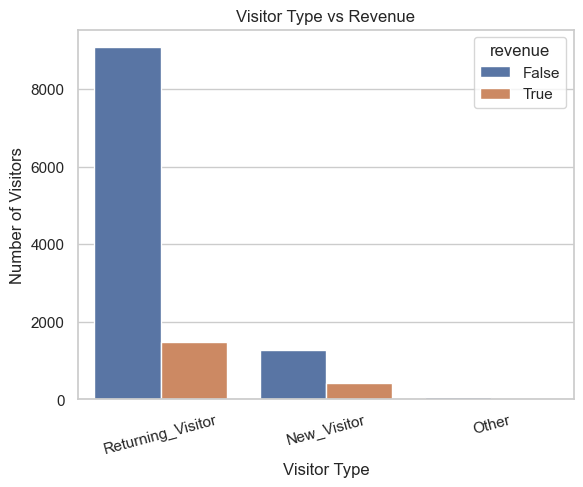

In [11]:
# Comparison of Visitor-Type Proportions by Revenue
sns.countplot(data=df_raw, x='visitor_type', hue='revenue')
plt.title('Visitor Type vs Revenue')
plt.ylabel('Number of Visitors')
plt.xlabel('Visitor Type')
plt.xticks(rotation=15)
plt.show()

> **Insight:**
The majority of purchases are driven by **Returning Visitors**, indicating that users who have previously visited are more likely to convert. This provides a strong signal to prioritize remarketing strategies.

## **4. Average Session Duration Analysis: Purchasers vs. Non-Purchasers**

In [12]:
# Average Session Duration: Purchasers vs. Non-Purchasers
duration_cols = ['administrative__duration', 'informational__duration', 'product_related__duration']

df_raw.groupby('revenue')[duration_cols].mean()

,administrative__duration,informational__duration,product_related__duration
revenue,,,
False,73.740111,30.236237,1069.987809
True,119.483244,57.611427,1876.209615


> **Insight:**
Visitors who complete a purchase spend significantly more time on product pages (`product_related_duration`). This suggests that session duration is a strong indicator of purchase intent.

## **5. Correlation of Numerical Features with the Target (`revenue`)**

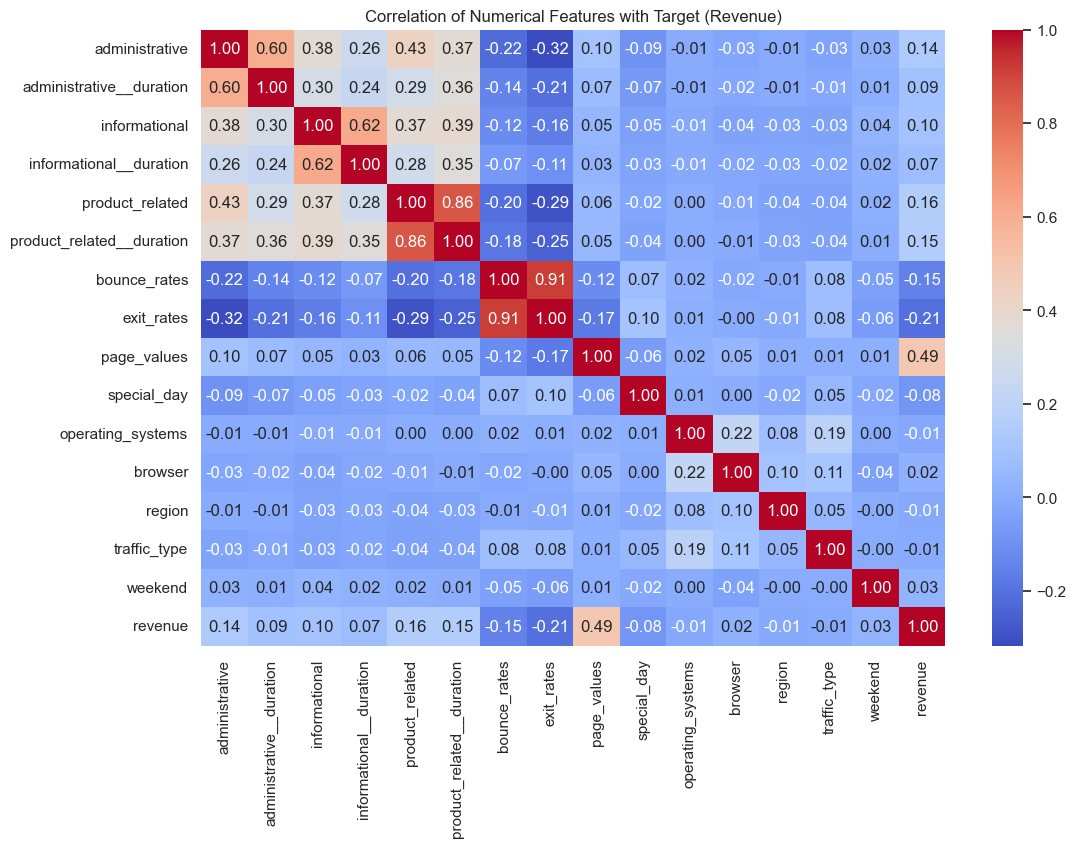

In [13]:
# Correlation of Numerical Features with the Target (`revenue`)

plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Numerical Features with Target (Revenue)')
plt.show()

> **Insight:**

The features with the strongest positive correlation with revenue are:

- `product_related_duration`
- `product_related`
- `page_values`

By contrast, `bounce_rates` and `exit_rates` exhibit negative correlations. In practice, sessions characterized by quick exits or high bounce behavior are much less likely to convert.

---

# **V. FEATURE ENGINEERING**

In [14]:
# Check the DataFrame info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   administrative             12330 non-null  int64   
 1   administrative__duration   12330 non-null  float64 
 2   informational              12330 non-null  int64   
 3   informational__duration    12330 non-null  float64 
 4   product_related            12330 non-null  int64   
 5   product_related__duration  12330 non-null  float64 
 6   bounce_rates               12330 non-null  float64 
 7   exit_rates                 12330 non-null  float64 
 8   page_values                12330 non-null  float64 
 9   special_day                12330 non-null  float64 
 10  month                      12330 non-null  category
 11  operating_systems          12330 non-null  int64   
 12  browser                    12330 non-null  int64   
 13  region                     1233

> **Insight:**
The columns `month`, `visitor_type`, `region`, `browser`, `operating_systems`, and `traffic_type` are categorical features. The target variable is `revenue`. There is no unique identifier column to drop, and all features are considered relevant to the prediction task.

## **Convert the `revenue` column’s data type from Boolean to Integer**

In [15]:
# Convert the `revenue` column’s data type from Boolean to Integer
df_raw['revenue'] = df_raw['revenue'].astype(int)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   administrative             12330 non-null  int64   
 1   administrative__duration   12330 non-null  float64 
 2   informational              12330 non-null  int64   
 3   informational__duration    12330 non-null  float64 
 4   product_related            12330 non-null  int64   
 5   product_related__duration  12330 non-null  float64 
 6   bounce_rates               12330 non-null  float64 
 7   exit_rates                 12330 non-null  float64 
 8   page_values                12330 non-null  float64 
 9   special_day                12330 non-null  float64 
 10  month                      12330 non-null  category
 11  operating_systems          12330 non-null  int64   
 12  browser                    12330 non-null  int64   
 13  region                     1233

> The `revenue` column’s data type has been successfully converted to integer.

## **Check for Duplicates & Missing Values**

In [16]:
# Check for duplicate rows in the dataset
df_raw.duplicated().sum()

# drop duplicate rows
df_raw = df_raw.drop_duplicates()

In [17]:
# Cek missing values
missing_values = df_raw.isna().sum().sort_values(ascending=False)

# Display only columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

In [18]:
# Check the percentage of missing values
missing_percentage = df_raw.isnull().mean() * 100

# Display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort from highest to lowest
missing_percentage = missing_percentage.sort_values(ascending=False)

# Display
print(missing_percentage)

Series([], dtype: float64)


> The dataset contains no duplicates and no missing values. Checking for missing values is essential, as missing data can trigger errors during model training, reduce accuracy, and compromise the analysis.

## **Cardinality Check**

In [19]:
# copy dataset raw to df
df = df_raw.copy()

In [20]:
# function check cardinality
def cardinality_check(df, list_cols):
  # code untuk cek nilai unique
  raw_unique = []

  for col in list_col:
    row = [col, df[col].nunique(), df[col].unique()]

    raw_unique.append(row)

  result = pd.DataFrame(raw_unique, columns=['Nama kolom', 'jumlah nilai unique', 'nilai unique'])

  # show df
  return result

In [21]:
# setting display
pd.set_option('max_colwidth', None)

# list columns
list_col = df.columns

# check
cardinality_check(df, list_col)

,Nama kolom,jumlah nilai unique,nilai unique
0,administrative,27,"[0, 1, 2, 4, 12, 3, 10, 6, 5, 9, 8, 16, 13, 11, 7, 18, 14, 17, 19, 15, 24, 22, 21, 20, 23, 27, 26]"
1,administrative__duration,3335,"[0.0, 53.0, 64.6, 6.0, 18.0, 9.0, 56.0, 16.0, 279.4166667, 87.83333333, 44.0, 1005.666667, 36.0, 18.33333333, 61.0, 31.0, 58.5, 326.25, 22.0, 462.0, 20.0, 111.5, 103.625, 19.0, 58.0, 9.5, 41.3, 87.0, 293.7782051, 47.0, 1226.0, 52.0, 112.9607843, 94.0, 32.0, 218.0, 119.0, 281.0, 40.0, 107.0, 49.0, 57.0, 2.0, 123.0, 118.0, 38.0, 54.0, 993.0, 74.25, 666.8333333, 73.0, 154.0, 49.33333333, 118.5, 153.5, 72.25, 24.5, 155.6313131, 21.33333333, 191.0, 96.5, 13.0, 1388.75, 51.0, 158.0, 10.0, 28.0, 27.0, 15.0, 1249.809524, 390.0, 215.5238095, 11.0, 8.0, 171.25, 227.3333333, 86.0, 7.0, 186.9761905, 138.0, 374.0, 14.0, 96.0, 615.25, 111.0, 147.0, 53.16666667, 48.5, 21.0, 115.3333333, 32.28571429, 277.75, 241.1666667, 64.0, 25.5, 130.0, 79.0, 84.0, 41.0, 618.0, ...]"
2,informational,17,"[0, 1, 2, 4, 16, 5, 3, 14, 6, 12, 7, 9, 10, 8, 11, 24, 13]"
3,informational__duration,1258,"[0.0, 120.0, 16.0, 94.0, 93.0, 75.0, 19.0, 22.0, 1210.397619, 153.0, 48.5, 51.0, 3.0, 144.0, 125.0, 127.0, 261.0, 306.3333333, 84.0, 740.0, 303.25, 21.5, 1220.0, 235.0, 100.0, 64.0, 47.0, 205.0, 70.0, 14.33333333, 24.0, 40.0, 136.0, 116.0, 929.0, 18.0, 155.5, 9.0, 1165.166667, 60.0, 528.0, 28.0, 654.3333333, 246.0, 142.0, 18.5, 39.0, 629.0, 267.5, 4.0, 132.0, 57.0, 14.0, 148.5, 954.0, 762.5, 449.3333333, 71.0, 212.5, 1411.0, 447.0, 28.5, 90.0, 245.0, 15.0, 125.0952381, 103.0, 404.0, 147.8666667, 263.0, 41.0, 53.0, 126.0, 371.0, 77.0, 395.0, 54.0, 40.66666667, 399.3333333, 345.0, 23.0, 29.5, 75.25, 122.0, 844.0, 407.0, 60.5, 81.0, 329.5, 162.0, 298.0, 357.0, 235.55, 30.0, 104.0, 17.0, 88.0, 321.6666667, 26.0, 336.5, ...]"
4,product_related,311,"[1, 2, 10, 19, 0, 3, 16, 7, 6, 23, 13, 20, 8, 5, 32, 4, 45, 14, 52, 9, 46, 15, 22, 11, 12, 36, 42, 27, 90, 18, 38, 17, 128, 25, 30, 21, 51, 26, 28, 31, 24, 50, 96, 49, 68, 98, 67, 55, 35, 37, 29, 34, 71, 63, 87, 40, 33, 54, 64, 75, 39, 111, 81, 61, 47, 44, 88, 149, 41, 79, 66, 43, 258, 80, 62, 83, 173, 48, 58, 57, 56, 69, 82, 59, 109, 287, 53, 84, 78, 137, 113, 89, 65, 60, 104, 129, 77, 74, 93, 76, ...]"
5,product_related__duration,9551,"[0.0, 64.0, 2.666666667, 627.5, 154.2166667, 37.0, 738.0, 395.0, 407.75, 280.5, 98.0, 68.0, 1668.285119, 334.9666667, 32.0, 2981.166667, 136.1666667, 105.0, 15.0, 156.0, 1135.444444, 76.0, 63.0, 1582.75, 35.0, 78.0, 209.5, 183.6666667, 380.5, 2086.242857, 388.0, 298.0, 482.0, 4084.393939, 22.0, 310.1666667, 34.0, 88.0, 622.25, 222.4, 80.0, 800.8333333, 265.1666667, 29.0, 160.0, 135.6666667, 998.7416667, 104.0, 381.6865079, 169.0, 400.8, 1553.583333, 706.5, 798.3333333, 6951.972222, 902.0, 197.3777778, 43.0, 426.6666667, 135.0, 588.3333333, 2111.341667, 208.0, 270.0, 39.5, 375.0, 150.0, 138.0, 337.5, 620.0333333, 168.8461538, 52.0, 649.25, 925.3333333, 33.0, 1566.5, 50.0, 644.2, 2635.177778, 607.0, 415.0, 2083.530952, 281.6666667, 27.0, 215.0, 162.0, 114.0, 5062.213753, 253.0, 436.5, 1045.833333, 317.8333333, 1146.333333, 577.0, 95.0, 301.5, 243.0, 135.5, 442.3333333, 41.0, ...]"
6,bounce_rates,1872,"[0.2, 0.0, 0.05, 0.02, 0.015789474, 0.01875, 0.008333333, 0.002857143, 0.043478261, 0.04, 0.014285714, 0.015384615, 0.025, 0.028571429, 0.003030303, 0.017142857, 0.066666667, 0.011111111, 0.011764706, 0.009, 0.002150538, 0.004347826, 0.016666667, 0.057142857, 0.003703704, 0.038095238, 0.004166667, 0.007058824, 0.15, 0.044444444, 0.000854701, 0.008, 0.012903226, 0.018181818, 0.028, 0.133333333, 0.005555556, 0.007142857, 0.0075, 0.1, 0.033333333, 0.008695652, 0.03030303, 0.015217391, 0.086666667, 0.010743802, 0.003174603, 0.001960784, 0.036190476, 0.009090909, 0.002061856, 0.013068182, 0.037619048, 0.006666667, 0.005714286, 0.08, 0.001481481, 0.010526316, 0.004, 0.005263158, 0.006896552, 0.011578947, 0.022807018, 0.023529412, 0.005, 0.012676056, 0.007246377, 0.01, 0.015555556, 0.006451613, 0.035714286, 0.0

> **Insight:** Based on the cardinality analysis, the dataset exhibits feature combinations ranging from low to very high variability. Features such as `administrative`, `informational`, and `special_day` have relatively few unique values, making them suitable to be treated as categorical or ordinal depending on context. In contrast, duration features like `administrative__duration`, `informational__duration`, and especially `product_related__duration` have thousands of unique values, reflecting continuous, high-variance behavior that may contain outliers and warrant normalization or transformation. Several fields:`month`, `operating_systems`, and `browser` have a moderate number of categories and can be encoded via one-hot or ordinal encoding. Meanwhile, features such as `page_values`, `bounce_rates`, and `exit_rates` display highly granular distributions and require distributional checks for skewness and outliers. The target `revenue` is binary, appropriate for classification. These insights are critical for defining the preprocessing strategy, choosing encoding methods, scaling, and outlier handlingto improve model performance.

## **Split the Data**

In [22]:
# Define X (features) and y (target) for the dataset
# X includes all columns except 'revenue' (the target)
# y is the 'revenue' column
X = df.drop(columns=['revenue'])    # Drop the target column, keep features
y = df['revenue']

# Split the data into train and test sets
# 80% of the data for training, 20% for testing, random_state for consistent results
X_train, X_test, y_train, y_test = train_test_split(
    X,             # features
    y,             # target
    test_size=0.2, # test set size
    random_state=42
)

num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Display the size of the split data
print("Size of X_train:", X_train.shape)
print("Size of X_test :", X_test.shape)

num_cols, cat_cols

Size of X_train: (9764, 17)
Size of X_test : (2441, 17)


(['administrative',
  'administrative__duration',
  'informational',
  'informational__duration',
  'product_related',
  'product_related__duration',
  'bounce_rates',
  'exit_rates',
  'page_values',
  'special_day',
  'operating_systems',
  'browser',
  'region',
  'traffic_type'],
 ['month', 'visitor_type'])

> **Insight:**
The data has been split into training and testing sets with stratification on the target to preserve the `revenue` class proportions in both subsets.

## **Outlier Detection & Handling**

In [23]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

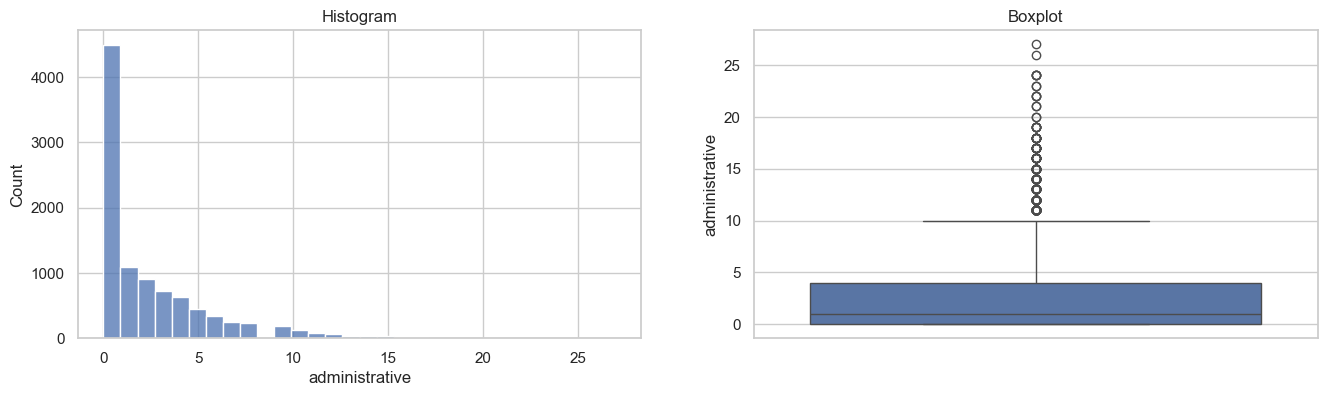

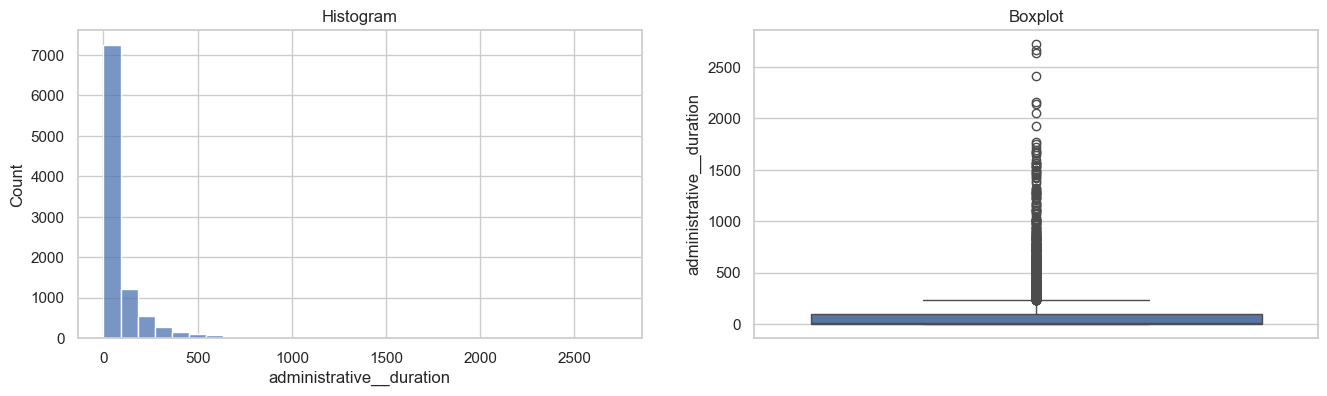

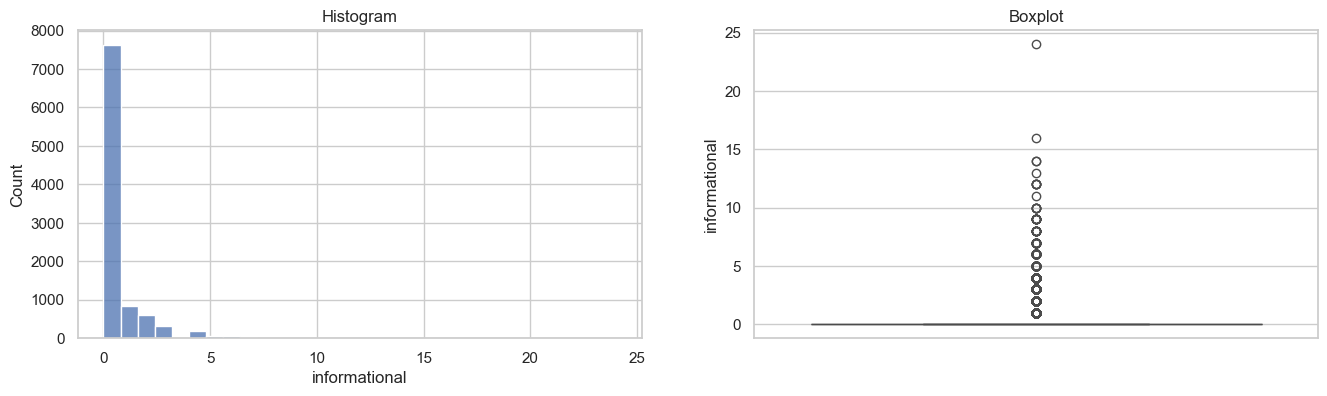

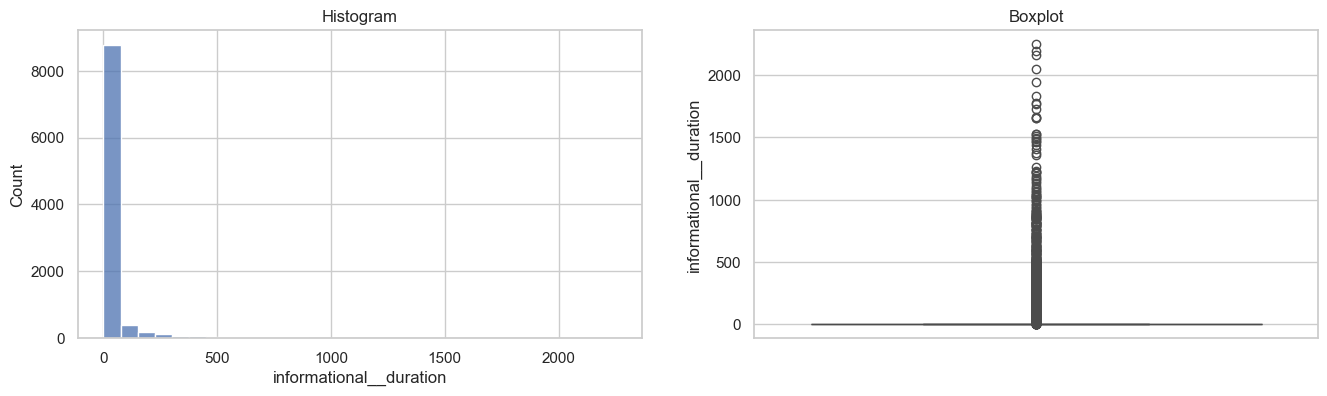

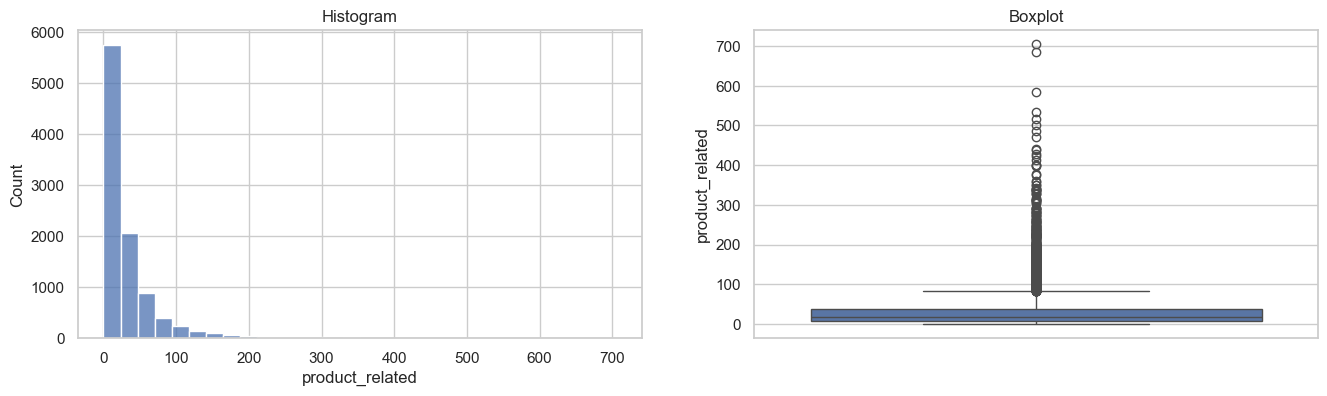

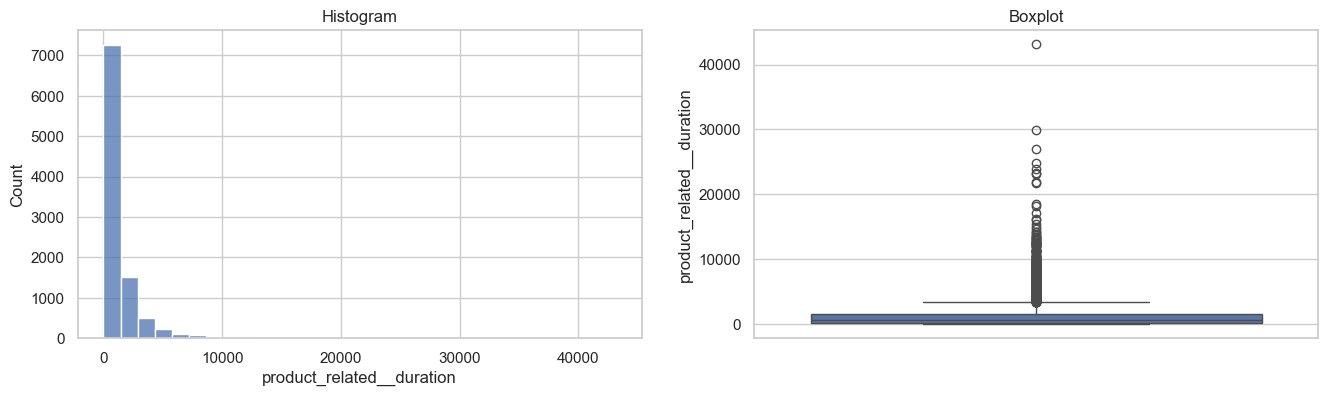

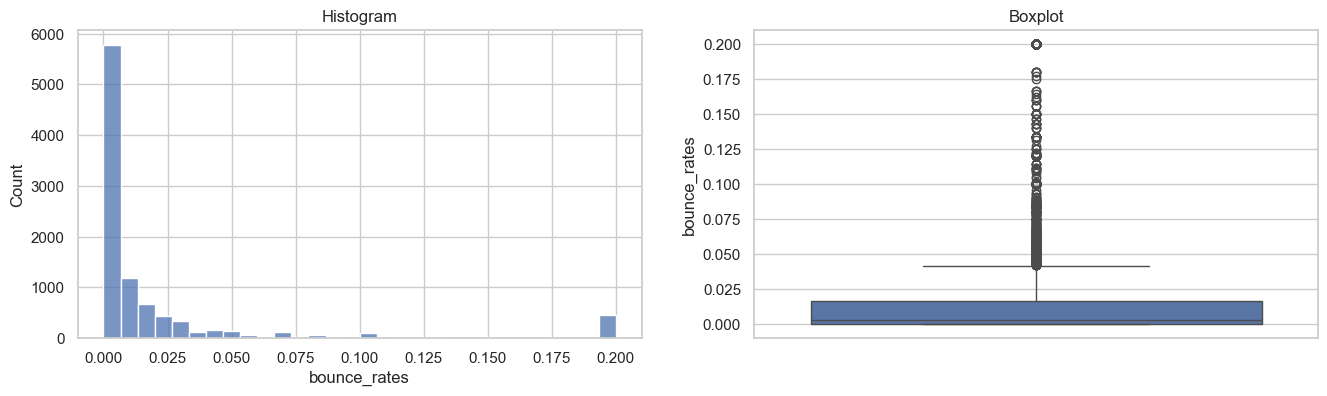

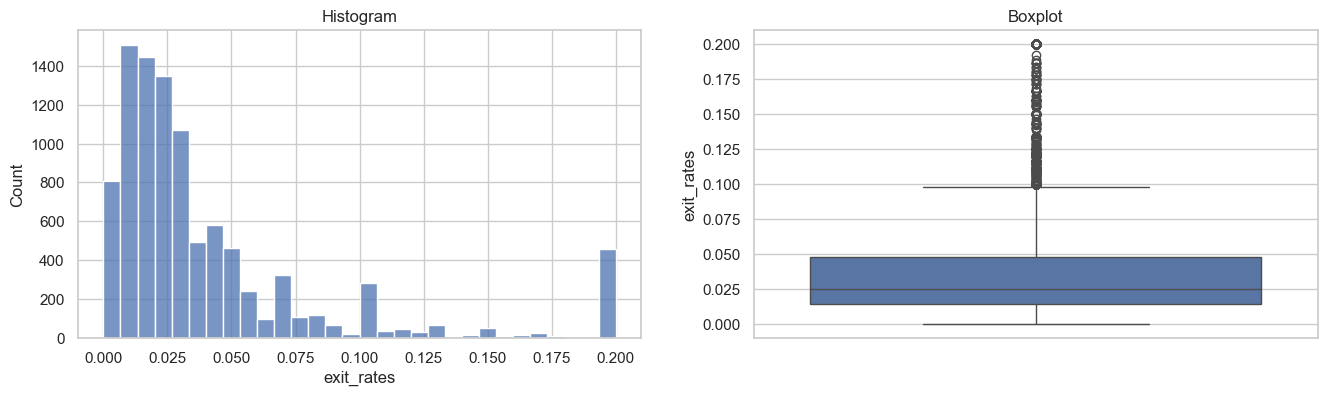

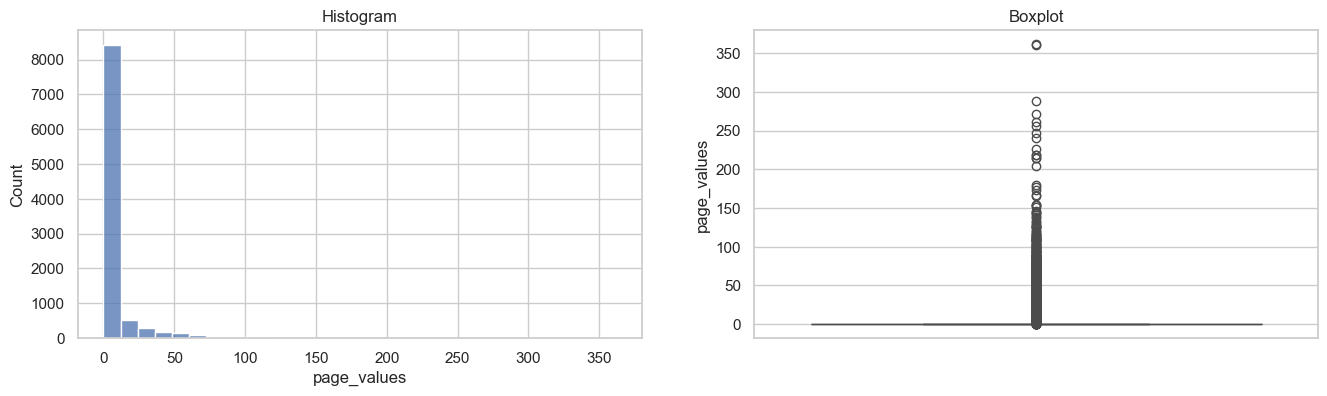

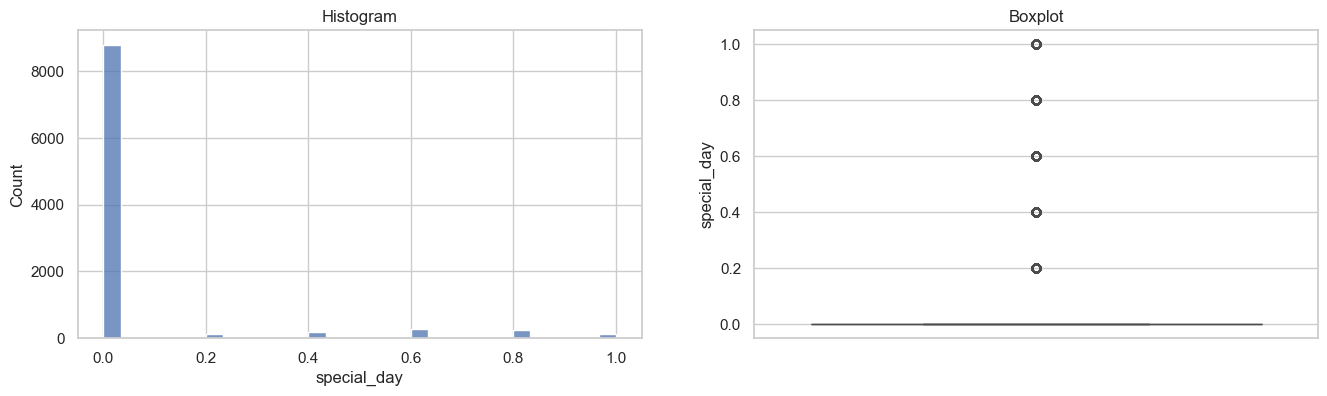

In [24]:
# checking distribution and upper, lower boundaries
list_cols = ['administrative', 'administrative__duration', 'informational', 'informational__duration', 'product_related', 
             'product_related__duration', 'bounce_rates', 'exit_rates', 'page_values', 'special_day'
             ]

# check
for col in list_cols:
    diagnostic_plots(X_train, col)

In [25]:
def outliers_checker(X_train:pd.DataFrame, list_cols:list):
  '''
  Function to check outliers in numerical columns based on their distribution.
  '''

  # Initialize an empty list to store results
  result = []

  for col in list_cols:
    row = []

    # add column name
    row.append(col)

    # check normality
    if np.abs(X_train[col].skew()) > 1 :
      row.append('Extreme Skew')
    elif np.abs(X_train[col].skew()) > 0.5:
      row.append('Skew')
    else:
      row.append('Normal')

    # upper dan lower boundaries
    if row[1] == 'normal':
      upper = X_train[col].mean() + 3 * X_train[col].std()
      lower = X_train[col].mean() - 3 * X_train[col].std()
    elif row[1] == 'skew':
      iqr = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
      upper = X_train[col].quantile(0.75) + 1.5 * iqr
      lower = X_train[col].quantile(0.25) - 1.5 * iqr
    else:
      iqr = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
      upper = X_train[col].quantile(0.75) + 3 * iqr
      lower = X_train[col].quantile(0.25) - 3 * iqr

    # add upper and lower boundaries
    row.append(round(upper, 2))
    row.append(round(lower, 2))

    # check outliers exists or not
    if len(X_train.loc[(X_train[col]<lower) | (X_train[col]>upper)]) > 0:
      row.append('Has Outliers')
      row.append(round(len(X_train.loc[(X_train[col]<lower) | (X_train[col]>upper)]) / len(X_train) * 100,2))
    else:
      row.append('No Outliers')
      row.append(0.0)


    result.append(row)

  result = pd.DataFrame(result, columns=['Nama Kolom', 'Skewness', 'Upper Boundary',
                                         'Lower Boundary', 'Outliers Status', 'Outliers Pct (in %)'])
  return result

In [26]:
# checking distribution and upper, lower boundaries
list_cols = ['administrative', 'administrative__duration', 'informational', 'informational__duration', 'product_related', 
             'product_related__duration', 'bounce_rates', 'exit_rates', 'page_values', 'special_day'
             ]

# check
outliers_checker(X_train, list_cols)

,Nama Kolom,Skewness,Upper Boundary,Lower Boundary,Outliers Status,Outliers Pct (in %)
0,administrative,Extreme Skew,16.00,-12.00,Has Outliers,0.47
1,administrative__duration,Extreme Skew,376.00,-282.00,Has Outliers,4.66
2,informational,Extreme Skew,0.00,0.00,Has Outliers,21.90
3,informational__duration,Extreme Skew,0.00,0.00,Has Outliers,19.99
4,product_related,Extreme Skew,128.00,-82.00,Has Outliers,3.65
5,product_related__duration,Extreme Skew,5320.25,-3651.41,Has Outliers,3.25
6,bounce_rates,Extreme Skew,0.07,-0.05,Has Outliers,7.60
7,exit_rates,Extreme Skew,0.15,-0.09,Has Outliers,5.44
8,page_values,Extreme Skew,0.00,0.00,Has Outliers,22.59
9,special_day,Extreme Skew,0.00,0.00,Has Outliers,9.95


> All variables exhibit outliers, accordingly, we will apply IQR-based capping to remove them.

In [27]:
# Handle outliers using extreme winsorization (Winsorizer)
list_extreme = ['administrative', 'administrative__duration',
                'product_related', 'product_related__duration', 'bounce_rates', 'exit_rates'
                ]

winsoriser_fare = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=list_extreme,
                             missing_values='ignore')

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

In [28]:
outliers_checker(X_train_capped, list_cols)

,Nama Kolom,Skewness,Upper Boundary,Lower Boundary,Outliers Status,Outliers Pct (in %)
0,administrative,Extreme Skew,16.00,-12.00,No Outliers,0.00
1,administrative__duration,Extreme Skew,376.00,-282.00,No Outliers,0.00
2,informational,Extreme Skew,0.00,0.00,Has Outliers,21.90
3,informational__duration,Extreme Skew,0.00,0.00,Has Outliers,19.99
4,product_related,Extreme Skew,128.00,-82.00,No Outliers,0.00
5,product_related__duration,Extreme Skew,5320.25,-3651.41,No Outliers,0.00
6,bounce_rates,Extreme Skew,0.07,-0.05,No Outliers,0.00
7,exit_rates,Extreme Skew,0.15,-0.09,No Outliers,0.00
8,page_values,Extreme Skew,0.00,0.00,Has Outliers,22.59
9,special_day,Extreme Skew,0.00,0.00,Has Outliers,9.95


>  **Insight:**
Outliers have been capped using a Winsorizer to minimize distortion of the model. For columns where outliers persist, they cannot be reliably addressed due to extreme skewness in the data.

## **Feature Selection**

Feature selection is necessary to reduce noise, improve model performance, and shorten computation time by retaining only those features that are truly relevant to the target.

In [29]:
# Drop unnecessary columns
dropped_cols = ['browser', 'region', 'traffic_type', 'operating_systems']
X_train_capped = X_train_capped.drop(dropped_cols, axis=1)

# Display the result
print(X_train_capped)

       administrative  administrative__duration  informational  \
5304                0                  0.000000              0   
9686                0                  0.000000              0   
11085               7                194.083333              1   
7515                7                236.400000              0   
6717                0                  0.000000              0   
...               ...                       ...            ...   
12086               0                  0.000000              0   
5272                6                 79.500000              1   
5475                2                 79.600000              3   
874                 3                 64.500000              0   
7357                1                 54.400000              6   

       informational__duration  product_related  product_related__duration  \
5304                      0.00                6                 132.000000   
9686                      0.00               87    

> Based on cardinality analysis and relevance to predictive modeling, the following columns should be considered for removal due to reasons such as redundant information, excessively high cardinality without strong predictive value, or low informativeness.

> `browser` (13 unique values)

Often not highly relevant for predicting revenue, unless the dataset pertains to a tech-focused context or device-level analytics.

> `region` (9 unique values)

Unless there is evidence that geography materially affects conversion (revenue), this feature tends to be weakly informative.

> `traffic_type` (20 unique values)

While potentially meaningful, it has many nominal categories with no ordinal structure. This can add complexity and degrade model performance.

> `operating_systems` (8 unique values)

Similar to `browser`, it may introduce noise if there is no clear, demonstrated impact on conversion.

In [30]:
# define list cols
num_dis_cols = ['administrative', 'informational', 'product_related']

# statistical test
result = []

# Use X_train_capped and y_train
for col in num_dis_cols:
    row = []
    # Ensure both arrays have the same length
    corr, p_value = stats.spearmanr(X_train_capped[col], y_train)

    # add column
    row.append(col)

    # add corr
    row.append(corr)

    # add p_value
    if p_value < 0.05:
        row.append('Statistically Significant')
    else:
        row.append('Not Significant')

    result.append(row)

result = pd.DataFrame(result, columns=['Nama Kolom', 'Correlation', 'Status'])

result

,Nama Kolom,Correlation,Status
0,administrative,0.158729,Statistically Significant
1,informational,0.107277,Statistically Significant
2,product_related,0.196228,Statistically Significant


**Numerical Continuous**

In [31]:
# define list cols
num_con_cols = ['administrative__duration', 'informational__duration', 'product_related__duration',
             'bounce_rates', 'exit_rates', 'page_values',
             'special_day']


# statistical test
result = []

for col in num_con_cols:
  row = []
  corr, p_value = pearsonr(X_train_capped[col], y_train)

  # add column
  row.append(col)

  # add corr
  row.append(corr)

  # add p_value
  if p_value < 0.05:
    row.append('Statistically Significant')
  else:
    row.append('Not significant')

  result.append(row)


result = pd.DataFrame(result, columns=['Nama Kolom', 'Correlation', 'Status'])

result

,Nama Kolom,Correlation,Status
0,administrative__duration,0.122997,Statistically Significant
1,informational__duration,0.064574,Statistically Significant
2,product_related__duration,0.184939,Statistically Significant
3,bounce_rates,-0.174255,Statistically Significant
4,exit_rates,-0.220136,Statistically Significant
5,page_values,0.491563,Statistically Significant
6,special_day,-0.084955,Statistically Significant


**Categorical Nominal**

In [32]:
# define list
nom_cat_cals = ['visitor_type']

# visitor_type
returning_visitor = y_train.loc[X_train_capped[X_train_capped['visitor_type'].str.strip() =='Returning_Visitor'].index]
new_visitor  =y_train.loc[X_train_capped[X_train_capped['visitor_type'].str.strip() =='New_Visitor'].index]
other =y_train.loc[X_train_capped[X_train_capped['visitor_type'].str.strip() =='Other'].index]

res = stats.f_oneway(returning_visitor, new_visitor, other)
print('P-value:',[ 'Significantly Related' if res.pvalue < 0.05 else 'Not Significant'])

P-value: ['Significantly Related']


**Categorical Ordinal**

In [33]:
# Kendall mapping
month_map = X_train_capped['month'].map({
    'Feb': 1, 'Mar': 2, 'May': 3, 'June': 4,
    'Jul': 5, 'Aug': 6, 'Sep': 7, 'Oct': 8,
    'Nov': 9, 'Dec': 10
})

corr_tau, pval_k = stats.kendalltau(month_map, y_train)
print('P-value:', ['Significantly Related' if pval_k < 0.05 else 'Not Significant'])

P-value: ['Significantly Related']


## **Scaling & Encoding**

In [34]:
# divide columns

num_cols = ['administrative', 'administrative__duration', 'informational', 'informational__duration',
                'product_related', 'product_related__duration',
                'bounce_rates', 'exit_rates', 'page_values']
nom_cat_cols = ['visitor_type']
ord_cat_cols = ['month']
passthrough = ['special_day']

# pipeline data numerical
num_cols = Pipeline([
    ('scaler', StandardScaler())
])

# pipeline data categorical nominal
pipe_cat_nom = Pipeline([
    ('One Hot Encoder', OneHotEncoder(handle_unknown='ignore'))
])

# pipeline data categorical ordinal
pipe_cat_ord = Pipeline([
    ('Ordinal encoder', OrdinalEncoder(categories=[['Feb', 'Mar', 'May', 'June', 'Jul',
                                                    'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]))

])

# column transformer
preprocessor = ColumnTransformer([
    ('Num', num_cols, num_dis_cols),
    ('Cat Nominal', pipe_cat_nom, nom_cat_cols),
    ('Cat Ordinal', pipe_cat_ord, ord_cat_cols),
    ('Teruskan', 'passthrough', passthrough)
])

preprocessor

,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


>The function above assembles a data preprocessing pipeline using scikit-learn’s Pipeline and ColumnTransformer to prepare the data before it is fed into the machine learning model.

> **Insight:**
>The end-to-end preprocessing: data splitting, outlier handling, categorical encoding, and scaling has been consolidated into a final pipeline that is ready for model training.

---

# **VI. MODEL DEFINITION**

In this section, five supervised classification models are defined:

1. **K-Nearest Neighbors (KNN)**
An instance-based learning method that is simple and effective, particularly for moderately sized datasets. KNN assigns classes based on the proximity of observations.

2. **Support Vector Machine (SVM)**
Well-suited for binary classification and performs well in high-dimensional spaces. With kernel functions, it can handle non-linear decision boundaries.

3. **Decision Tree**
Easy to understand and interpret, and fast to train, but prone to overfitting.

4. **Random Forest**
An ensemble of multiple decision trees, offering greater stability and typically higher accuracy than a single tree.

5. **Gradient Boosting (Boosting)**
A boosting-based ensemble algorithm that achieves high accuracy by iteratively correcting the errors of prior models.

**Evaluation Metrics**

Because the target class revenue is imbalanced (most visitors do not purchase), accuracy alone is insufficient. We will therefore use:

- **F1 Score**: a balance of precision and recall.

- **Cross-validation** for more generalizable results.

- **Hyperparameter tuning** will be conducted on the best-performing model after initial training.

In [35]:
# KNN Classifier
model_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=7))
])

model_knn

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
# SVM Classifier
model_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, probability=True))
])

model_svm

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:
# Decision Tree Classifier
model_dtc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

model_dtc

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
# Random Forest Classifier
model_rfc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model_rfc

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
model_gboost = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

model_gboost

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


---

# **VII. MODEL TRAINING**

In [40]:
# Training model KNN
model_knn.fit(X_train_capped, y_train)

f1_train_cross_val = cross_val_score(model_knn,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.18345865 0.1732746  0.18155198]
F1 Score - Mean - Cross Validation :  0.17942840645752167
F1 Score - Std - Cross Validation  :  0.004420473831494448
F1 Score - Range of Test-Set       :  0.17500793262602723 - 0.1838488802890161


In [41]:
# training model SVM
model_svm.fit(X_train_capped, y_train)

f1_train_cross_val = cross_val_score(model_svm,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0. 0. 0.]
F1 Score - Mean - Cross Validation :  0.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  0.0 - 0.0


In [42]:
# training model decision tree classifier
model_dtc.fit(X_train_capped, y_train)

f1_train_cross_val = cross_val_score(model_dtc,
                                     X_train_capped,
                                        y_train,
                                        cv=3,
                                        scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))


F1 Score - All - Cross Validation  :  [0.24665982 0.2344086  0.25914316]
F1 Score - Mean - Cross Validation :  0.24673719095018543
F1 Score - Std - Cross Validation  :  0.010097987424470177
F1 Score - Range of Test-Set       :  0.23663920352571524 - 0.2568351783746556


In [43]:
# Training model Random Forest Classifier
model_rfc.fit(X_train_capped, y_train)
f1_train_cross_val = cross_val_score(model_rfc,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.2264631  0.21464646 0.2183187 ]
F1 Score - Mean - Cross Validation :  0.21980942135960477
F1 Score - Std - Cross Validation  :  0.004937944369752453
F1 Score - Range of Test-Set       :  0.21487147698985232 - 0.22474736572935722


In [44]:
# Training model gradient boosting classifier
model_gboost.fit(X_train_capped, y_train)
f1_train_cross_val = cross_val_score(model_gboost,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.07913669 0.13712375 0.07871199]
F1 Score - Mean - Cross Validation :  0.09832414071853662
F1 Score - Std - Cross Validation  :  0.02743601174323736
F1 Score - Range of Test-Set       :  0.07088812897529927 - 0.125760152461774


> Summary of five models (F1 scores from 3-fold cross-validation) and interpretations:

1. **K-Nearest Neighbors (KNN)**
F1: 0.179 (±0.004) - low and fairly consistent.

**Interpretation**: KNN is sensitive to scaling/noise and is less effective on data with many mixed features (numerical + encoded categorical).

2. **Support Vector Machine (SVM)**
F1: 0.000 across all folds.

**Interpretation**: The model likely predicts the majority class (non-purchase) due to class imbalance/default settings (e.g., unbalanced class_weight, unsuitable kernel/parameters).

3. **Decision Tree**
F1: 0.247 (±0.010) - best among the five models.

**Interpretation**: Trees capture non-linear feature interactions; remain cautious of overfitting (use depth limits/pruning).

4. **Random Forest**
F1: 0.220 (±0.005) - below Decision Tree but stable.

**Interpretation**: The ensemble offers better generalization; a strong candidate for further tuning.

5. **Gradient Boosting**
F1: 0.098 (±0.027) - low performance with considerable variance across folds.

**Interpretation**: Requires aggressive tuning (learning rate, number of estimators, depth) or consider modern variants (HistGradientBoosting, XGBoost/LightGBM).



---

# **VIII. MODEL EVALUATION**

In [45]:
y_train_pred_knn = model_knn.predict(X_train_capped)
y_test_pred_knn = model_knn.predict(X_test_capped)

y_train_pred_svm = model_svm.predict(X_train_capped)
y_test_pred_svm = model_svm.predict(X_test_capped)

y_train_pred_dtc = model_dtc.predict(X_train_capped)
y_test_pred_dtc = model_dtc.predict(X_test_capped)

y_train_pred_rfc = model_rfc.predict(X_train_capped)
y_test_pred_rfc = model_rfc.predict(X_test_capped)

y_train_pred_gboost = model_gboost.predict(X_train_capped)
y_test_pred_gboost = model_gboost.predict(X_test_capped)


> This prediction function is used to measure each model’s performance on the training and test sets, allowing us to evaluate whether the model is overfitting or underfitting. By comparing these results using metrics such as the F1 score and the classification report, we can assess consistency and select the most stable, generalizable model for unseen data. This step is critical in the final evaluation before moving to tuning or deployment.

In [46]:
# Evaluasi model KNN
print("KNN Classifier - Training Set")
print("F1 Score:", f1_score(y_train, y_train_pred_knn))
print("Classification Report:\n", classification_report(y_train, y_train_pred_knn))

KNN Classifier - Training Set
F1 Score: 0.30344827586206896
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8218
           1       0.64      0.20      0.30      1546

    accuracy                           0.86      9764
   macro avg       0.75      0.59      0.61      9764
weighted avg       0.83      0.86      0.82      9764



In [47]:
# Evaluasi model SVM
print("SVM Classifier - Training Set")
print("F1 Score:", f1_score(y_train, y_train_pred_svm))
print("Classification Report:\n", classification_report(y_train, y_train_pred_svm))


SVM Classifier - Training Set
F1 Score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      8218
           1       0.00      0.00      0.00      1546

    accuracy                           0.84      9764
   macro avg       0.42      0.50      0.46      9764
weighted avg       0.71      0.84      0.77      9764



In [48]:
# Evaluasi model Decision Tree Classifier
print("Decision Tree Classifier - Training Set")
print("F1 Score:", f1_score(y_train, y_train_pred_dtc))
print("Classification Report:\n", classification_report(y_train, y_train_pred_dtc))

Decision Tree Classifier - Training Set
F1 Score: 0.7881811204911742
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      8218
           1       0.97      0.66      0.79      1546

    accuracy                           0.94      9764
   macro avg       0.95      0.83      0.88      9764
weighted avg       0.94      0.94      0.94      9764



In [49]:
# Evaluasi model Random Forest Classifier
print("Random Forest Classifier - Training Set")
print("F1 Score:", f1_score(y_train, y_train_pred_rfc))
print("Classification Report:\n", classification_report(y_train, y_train_pred_rfc))

Random Forest Classifier - Training Set
F1 Score: 0.7964601769911505
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8218
           1       0.93      0.70      0.80      1546

    accuracy                           0.94      9764
   macro avg       0.94      0.84      0.88      9764
weighted avg       0.94      0.94      0.94      9764



In [50]:
# Evaluasi model Gradient Boosting Classifier
print("Gradient Boosting Classifier - Training Set")
print("F1 Score:", f1_score(y_train, y_train_pred_gboost))
print("Classification Report:\n", classification_report(y_train, y_train_pred_gboost))

Gradient Boosting Classifier - Training Set
F1 Score: 0.12668621700879765
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      8218
           1       0.68      0.07      0.13      1546

    accuracy                           0.85      9764
   macro avg       0.76      0.53      0.52      9764
weighted avg       0.82      0.85      0.79      9764



In [51]:
# dataframe comparation
compare_data = pd.DataFrame()
compare_data['Original'] = y_train
compare_data['Prediction KNN'] = y_train_pred_knn
compare_data['Prediction SVM'] = y_train_pred_svm
compare_data['Prediction DTC'] = y_train_pred_dtc
compare_data['Prediction RFC'] = y_train_pred_rfc
compare_data['Prediction GBoost'] = y_train_pred_gboost

compare_data.head(10)


,Original,Prediction KNN,Prediction SVM,Prediction DTC,Prediction RFC,Prediction GBoost
5304,0,0,0,0,0,0
9686,1,0,0,1,1,0
11085,0,0,0,0,0,0
7515,0,0,0,0,0,0
6717,0,0,0,0,0,0
5552,0,1,0,0,0,0
3183,0,0,0,0,0,0
7429,0,0,0,0,0,0
8600,0,0,0,0,0,0
10714,0,0,0,0,0,0


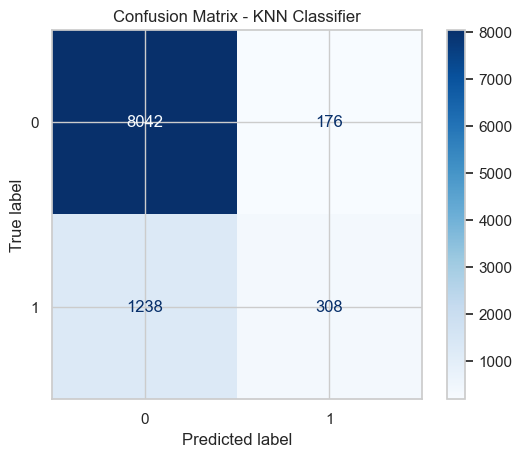

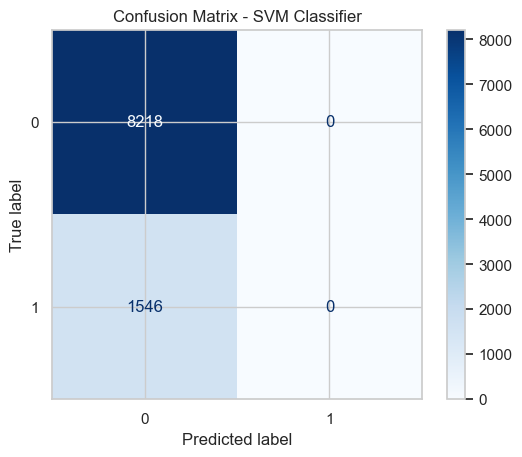

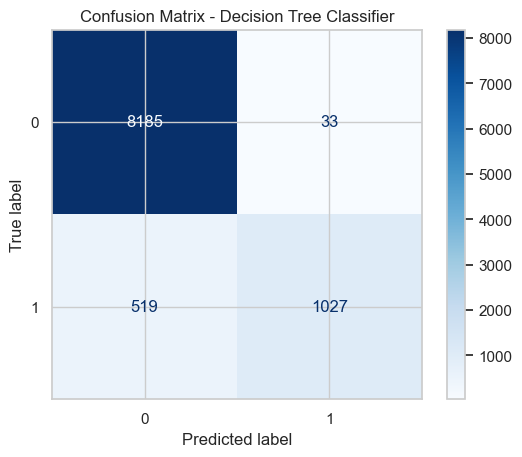

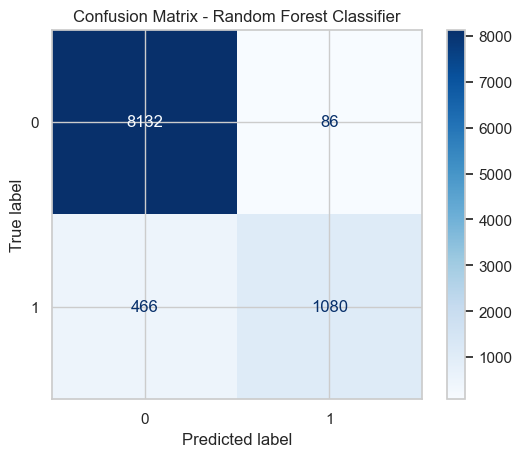

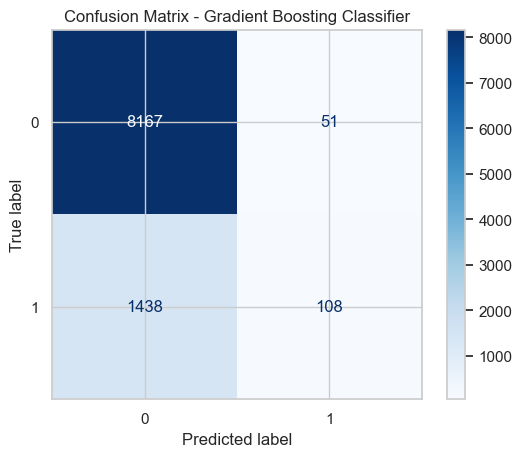

In [ ]:
# confusion matrix visualization
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix for KNN
plot_confusion_matrix(y_train, y_train_pred_knn, title='Confusion Matrix - KNN Classifier')

# Plot confusion matrix for SVM
plot_confusion_matrix(y_train, y_train_pred_svm, title='Confusion Matrix - SVM Classifier')

# Plot confusion matrix for Decision Tree Classifier
plot_confusion_matrix(y_train, y_train_pred_dtc, title='Confusion Matrix - Decision Tree Classifier')

# Plot confusion matrix for Random Forest Classifier
plot_confusion_matrix(y_train, y_train_pred_rfc, title='Confusion Matrix - Random Forest Classifier')

# Plot confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(y_train, y_train_pred_gboost, title='Confusion Matrix - Gradient Boosting Classifier')

> **Insight:** From the training‐set reports and confusion matrices, the Random Forest is the most accurate on train: it delivers 94% accuracy and the highest positive, class F1 (0.80), with 1,080 TP and 466 FN, slightly edging the Decision Tree (F1 0.79, 1,027 TP / 519 FN) albeit with more FP (86 vs. 33). However, both trees overfit. Their training F1 (0.79–0.80) is far above the cross-validation F1 (0.22–0.25), so the apparent superiority on train won’t fully carry over to new data. By comparison, KNN underfits the minority (recall 0.20, F1 0.30), Gradient Boosting shows very low positive recall (0.07, F1 0.13), and SVM collapses to predicting the majority class (F1 = 0). In short, although Random Forest is the most accurate on train, the **Decision Tree** appears slightly more generalizable among the five. However, both require rebalancing, tuning, and threshold calibration to achieve a good fit.

**Hyperparameter Tuning**

In [ ]:
# Hyperparameter tuning for Decision Tree with Grid Search

# Tuning parameters
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Pipeline for tuning
model_dtc = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Grid Search
grid_search = GridSearchCV(estimator=model_dtc,
                            param_grid=param_grid,
                            scoring='f1',
                            cv=5,
                            n_jobs=-1,  # Gunakan semua core CPU
                            verbose=1)

# Fit
grid_search.fit(X_train_capped, y_train)

# Results
print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Params: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best F1 Score: 0.244585344782177


> **Insight:** The 5-fold grid search (72 candidates, 360 fits) selected an essentially unpruned tree: `criterion='entropy'`, `max_depth=None`, `min_samples_leaf=1`, `min_samples_split=2` with a best **F1 of 0.2446**. This score is roughly on par with (slightly below) the pre-tuning CV result (0.247), indicating that the search space did not address the core limitation: severe class imbalance and overfitting risk. The chosen hyperparameters favor maximum complexity, which trees exploit but don’t generalize well on this problem. Next, steer tuning toward cost-sensitive and regularized settings: include `class_weight='balanced'`, constrain `max_depth (e.g., 5–20)`, raise `min_samples_leaf` (≥5–50) and `min_samples_split` (≥5–50), and optimize the decision threshold using a validation fold guided by PR-AUC/positive-class F1.

In [54]:
# perbanding hasil model decision tree sebelum tuning dan sesudah tuning
# simpan hasil tuning
best_model = grid_search.best_estimator_

# Sebelum tuning
model_dtc.fit(X_train_capped, y_train)
y_train_pred_dtc = model_dtc.predict(X_train_capped)

# Setelah tuning
model_dtc_tuned = grid_search.best_estimator_
y_train_pred_dtc_tuned = model_dtc_tuned.predict(X_train_capped)

# Membandingkan hasil model sebelum dan sesudah tuning
compare_data['prediksi Decision Tree'] = y_train_pred_dtc
compare_data['prediksi Decision Tree Tuning'] = y_train_pred_dtc_tuned

compare_data.head(10)


,Original,Prediction KNN,Prediction SVM,Prediction DTC,Prediction RFC,Prediction GBoost,prediksi Decision Tree,prediksi Decision Tree Tuning
5304,0,0,0,0,0,0,0,0
9686,1,0,0,1,1,0,1,1
11085,0,0,0,0,0,0,0,0
7515,0,0,0,0,0,0,0,0
6717,0,0,0,0,0,0,0,0
5552,0,1,0,0,0,0,0,0
3183,0,0,0,0,0,0,0,0
7429,0,0,0,0,0,0,0,0
8600,0,0,0,0,0,0,0,0
10714,0,0,0,0,0,0,0,0


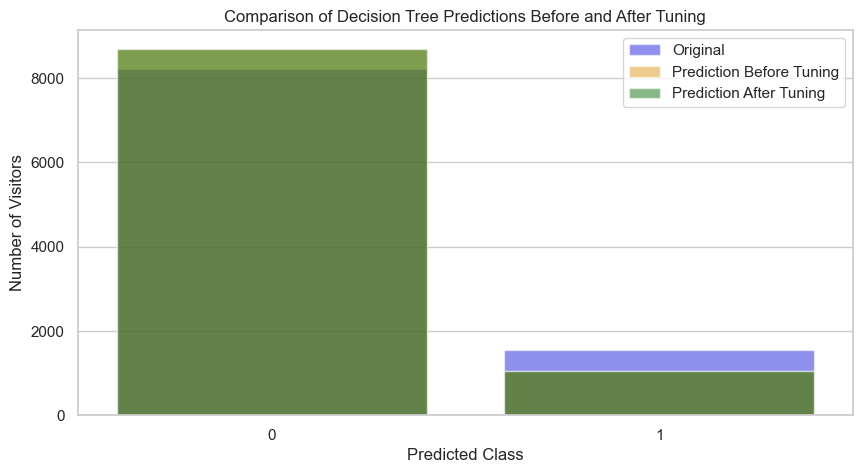

In [57]:
# Comparison of the Decision Tree Classifier Before and After Tuning (Visualization)
def plot_comparison(y_true, y_pred_before, y_pred_after, title='Comparison of Predictions'):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=y_true, label='Original', color='blue', alpha=0.5)
    sns.countplot(x=y_pred_before, label='Prediction Before Tuning', color='orange', alpha=0.5)
    sns.countplot(x=y_pred_after, label='Prediction After Tuning', color='green', alpha=0.5)
    plt.title(title)
    plt.xlabel('Predicted Class')
    plt.ylabel('Number of Visitors')
    plt.legend()
    plt.show()

# Plot comparison of predictions before and after tuning
plot_comparison(y_train, y_train_pred_dtc, y_train_pred_dtc_tuned,
                title='Comparison of Decision Tree Predictions Before and After Tuning')


> The comparison plot shows that, after tuning, the Decision Tree becomes more conservative: predictions for the non-purchase class (0) increase beyond the actual count and the pre-tuning estimate, while predicted purchasers (1) drop well below both the ground truth and the pre-tuning model. This indicates a decision boundary shifted toward the majority class,reducing false positives but further depressing recall on buyers, so overall F1 is unlikely to improve. In short, tuning biased the model toward higher specificity at the expense of sensitivity

---

# **IX. MODEL SAVING**

In [56]:
# Simpan model terbaik (Random Forest) ke dalam file pickle
with open('best_model_dtc.pkl', 'wb') as file:
    pickle.dump(best_model, file)

> The best model, **Decision Tree Classifier** has been saved as `best_model_dtc.pkl`. The file encapsulates the entire pipeline (preprocessing, scaling, encoding, and the predictive model), making it ready for inference or deployment without any additional preprocessing.

---

# **X. MODEL INFERENCE**


*Separate from this notebook*

---

# **XI. CONCLUSION**

From a modeling standpoint, the dataset is highly imbalanced (most sessions are non-purchases), so F1/PR-AUC are more appropriate than accuracy. The current baseline, Decision Tree, achieves 0.245 CV F1 and shows a sizable train-to-CV gap, indicating overfitting. Key positive signals include product-page engagement (`product_related_duration`, `product_related`) and `page_values`, while `bounce_rates`/`exit_rates` are negatively associated with purchase. Prioritize class-imbalance handling (`class_weight='balanced'`, SMOTE/undersampling within CV), stronger regularization of trees (`max_depth`, `min_samples_leaf/split`) and threshold tuning guided by precision–recall curves. Add targeted feature engineering (duration ratios, total dwell time, seasonality interactions, log transforms for skewed variables), calibrate probabilities (Platt or isotonic), prefer PR-AUC and positive-class F1 for selection, and consider calibrated ensembles (Balanced Random Forest, HistGB, XGBoost/LightGBM) with robust validation (e.g., nested CV) plus drift monitoring and periodic retraining.

From a business perspective, concentrate on customers most likely to convert: prioritize remarketing to returning visitors, and deploy real-time nudges when high intent is detected (long product dwell time or high `page_values`), limited-time offers, personalized recommendations, or proactive live chat. Reduce bounce/exit via funnel and UX improvements (page speed, transparent pricing/shipping, simplified one-page checkout). Plan campaigns around seasonal peaks (e.g., November/May) with tailored promotions and inventory readiness. Choose an economically optimal decision threshold using a cost matrix that reflects CAC, discount cost, and expected LTV. Validate interventions with disciplined A/B tests and track conversion uplift, average order value, and ROI by segment and channel to guide budget allocation.